In [1]:
from pathlib import Path
import torch
from torch import nn,optim
from mltools import ld,draw,MachineLearning

In [2]:
train_iter,val_iter,test_iter=ld.mnist('../data',batch_size=1000) # 获取训练集、验证集和测试集
# 设置模型结构
model=nn.Sequential(
    nn.Flatten(),
    nn.Linear(784,256),nn.ReLU(),
    nn.Linear(256,10))
device=torch.device('cuda') # 设置设备

class MLPMachineLearning(MachineLearning):pass

ml = MLPMachineLearning(model,train_iter,val_iter,test_iter,device=device)
model_path='../model/MLP.pth'

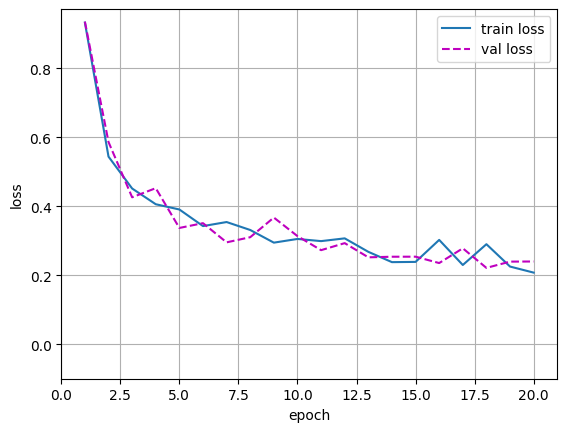

In [3]:
if True:
    ml.train(num_epochs=20,learning_rate=1e-1) # 训练
    if False:
        torch.save(model.state_dict(), model_path)
elif Path(model_path).exists():
    model.load_state_dict(torch.load(model_path, map_location=device))

In [4]:
ml.test() # 测试

Accuracy rate 0.9348999857902527


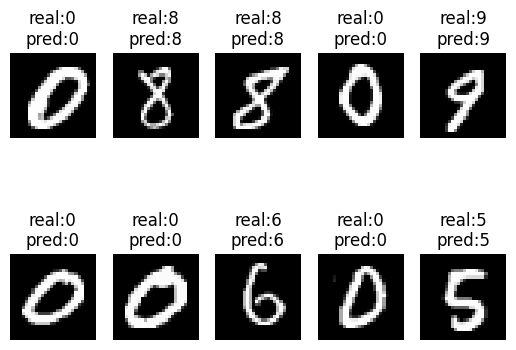

In [5]:
# 预测模型
def predict(model,test_iter,device):
    model.to(device) # 将网络复制到device上
    # 从测试中取一个批量
    x,y=next(iter(test_iter))
    x,y=x[:10].to(device),y[:10].to(device)
    # 预测
    y_pred=model(x).argmax(dim=1)
    labels=[f'real:{y[index]}\npred:{y_pred[index]}' for index in range(len(y))]
    # 输出样例图
    draw.images(x,labels,shape=(2,5))
predict(model,test_iter,device)